# Visualising Earnings Based on College Majors

In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. 

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.
- Using visualizations, we can start to explore questions from the dataset like:

Do students in more popular majors make more money?
- Using scatter plots

How many majors are predominantly male? Predominantly female?
- Using histograms

Which category of majors have the most students?
- Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True #enables autocomplete when you press tab. 
%matplotlib inline 
#Jupyter magic so that plots are displayed inline.

In [4]:
recent_grads = pd.read_csv('recent_grads.csv')
print(recent_grads.iloc[:1])
print(recent_grads.head())
print(recent_grads.tail())

   Rank  Major_code                  Major   Total     Men  Women  \
0     1        2419  PETROLEUM ENGINEERING  2339.0  2057.0  282.0   

  Major_category  ShareWomen  Sample_size  Employed  ...  Part_time  \
0    Engineering    0.120564           36      1976  ...        270   

   Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th   P75th  \
0                  1207          37           0.018381  110000  95000  125000   

   College_jobs  Non_college_jobs  Low_wage_jobs  
0          1534               364            193  

[1 rows x 21 columns]
   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGI

In [5]:
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

In [7]:
raw_data_count = recent_grads.shape #number of rows

(173, 21)

In [10]:
#Drop rows with missing values

recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape
cleaned_data_count

(172, 21)

In [11]:
#We can see from the above that only one row contained missing values and was dropped.

# Scatter Plots Using Pandas

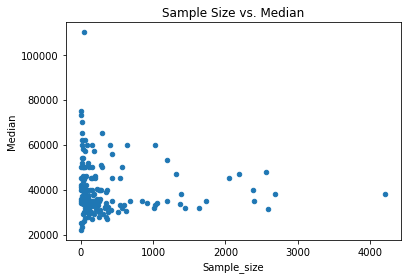

In [15]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample Size vs. Median')

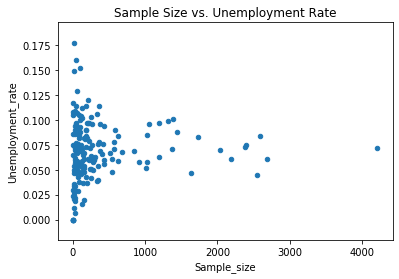

In [17]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample Size vs. Unemployment Rate')

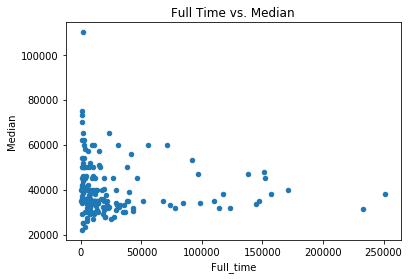

In [18]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full Time vs. Median')

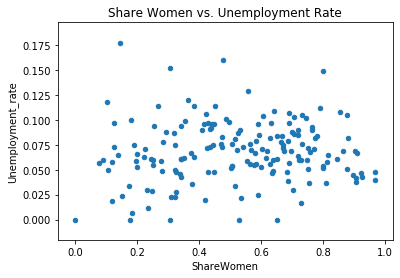

In [20]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share Women vs. Unemployment Rate')

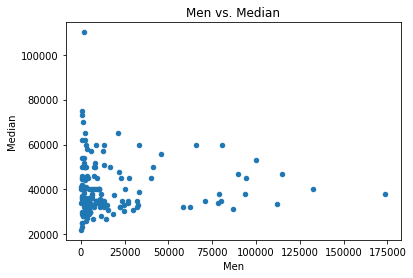

In [21]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. Median')

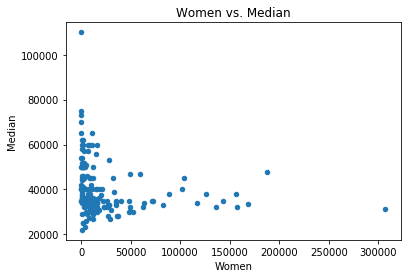

In [22]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. Median')

# Histograms Using Pandas

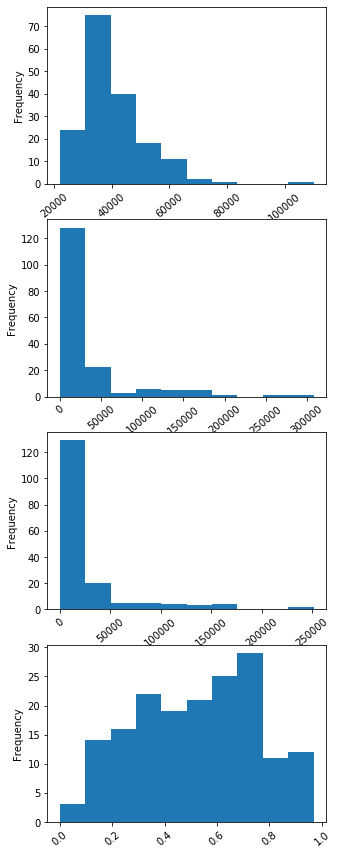

In [40]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,15))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

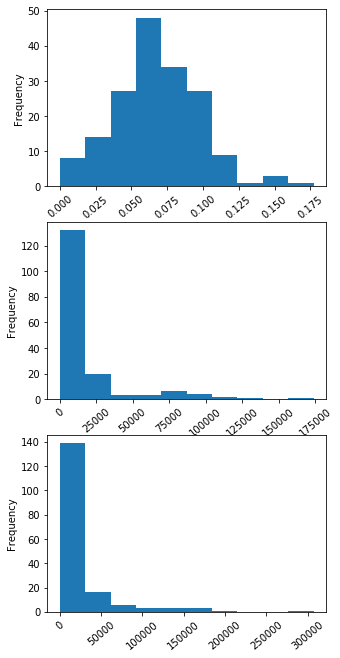

In [41]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,15))
for r in range(5,8):
    ax = fig.add_subplot(4,1,r-4)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

# Scatter Matrix Plot Using Pandas

In [42]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025932672470>,
      dtype=object)

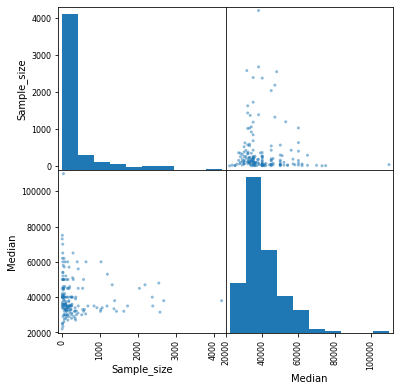

In [43]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025931DB6048>,
      dtype=object)

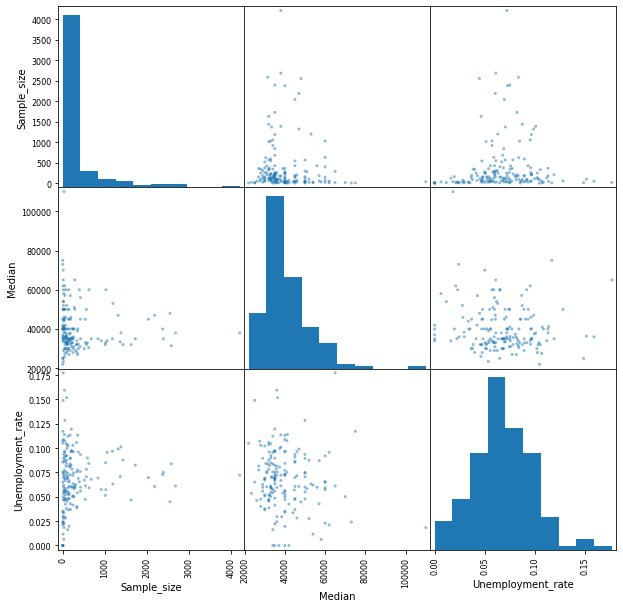

In [45]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

# Bar Plots Using Pandas

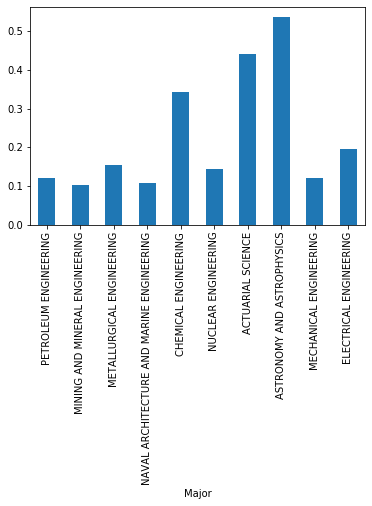

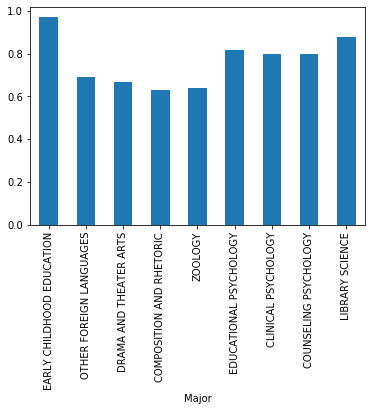

In [48]:
#Use bar plots to compare the percentages of women (ShareWomen) from 
#the first ten rows and last ten rows of the recent_grads dataframe.
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

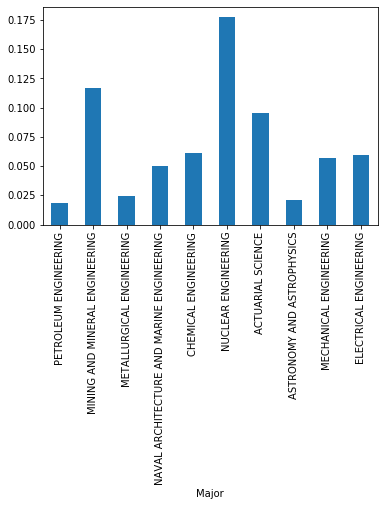

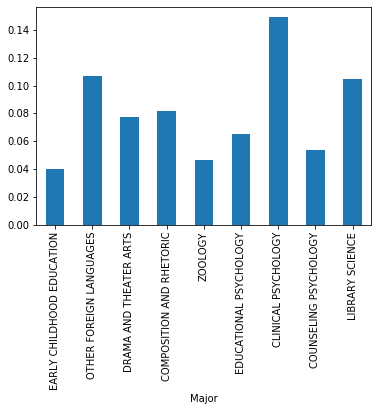

In [49]:
#Use bar plots to compare the unemployment rate (Unemployment_rate) from 
#the first ten rows and last ten rows of the recent_grads dataframe.
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)